# 순환 신경망(RNN)

## 확률과 언어 모델
word2vec 복습 및 자연어 현상을 확률로 기술하고, 언어 모델 설명

### word2vec을 확률 관점에서 바라보다.
* word2vec CBOW 모델 복습  
* CBOW 모델  
* $w_1, w_2, ..., w_T$ 단어열 말뭉치 고려
* 타깃 : t번째 단어
* 맥락 : 전후 (t-1, t+1)번째 단어
![img](./images/fig_5-1.png)

 $w_{t-1}, w_{t+1}$이 주어질 때, 타깃 $w_t$가 될 확률
 $$P(w_t | w_{t-1}, w_{t+1})$$
 
 * 왼쪽 윈도우 맥락 한정
![img](./images/fig_5-2.png)

CBOW 확률
 $$P(w_t | w_{t-2}, w_{t-1})$$
 
 이 표기에서 CBOW 손실 함수는 교차 엔트로피 오차로 유도한 결과로 나타낸다.
 $$L = -\log{P(w_t | w_{t-2}, w_{t-1})}$$
 
 * CBOW 모델 학습 : 위의 손실 함수(말뭉치 전체의 손실 함수의 총합)을 최소화하는 가중치 매개변수 찾기  
     * 맥락으로부터 타깃을 더 정확하게 추측 가능
     
 단어의 의미가 인코딩된 '단어의 분산 표현' 얻을 수 있다.  
 
 * 맥락으로부터 타깃을 추측하는 것 : $P(w_t | w_{t-2}, w_{t-1})$ 쓰임
     * 언어 모델

### 언어 모델
* 언어 모델(Language Model) : 단어 나열에 확률 부여
* 특정 단어 시퀸스에서 그 시퀸스가 일어날 가능성(혹은 자연스러운 단어 순서)를 확률로 평가
    * "you say good die"는 낮은 확률 출력
    
* 다양한 응용 가능 : 기계 번역, 음성 인식  
    * 음성 인식 : 후보 문장 생성 -> 언어 모델 -> _후보 문장이 문장으로써 자연스러운지_ 기준으로 순서  
    * 새로운 문장 생성 : 단어 순서의 자연스러움을 확률적 평가 가능 -> 확률 분포에 따라 다음 적합한 단어를 자아낼 수 있음

* 언어 모델 수식으로 설명  
    * $w_1, .., w_m$ 출현할 확률을 $P(w_1, ...,w_m)$ : 동시 확률  
    * 이를 사후 확률로 분해 가능하다.  
$$P(w_1, ...,w_m) = P(w_m | w_1, ...,w_{m-1})P(w_{m-1} | w_1, ..., W_{m-2})\\ ... P(w_3|w_1, w_2) P(w_2 | w_1) P(w_1) \\ = \prod_{t=1}^m P(w_t|w_1,...w_{t-1}) $$

    * 동시확률은 사후 확률의 곱으로 나타낸다.
    * 확률의 **곱셈정리**로 유도 가능
    
    $$P(A, B) = P(A|B)P(B)$$
    A와 B가 모두 일어날 확률은 B가 일어날 확률과 B가 일어난 후 A가 일어날 확률을 곱한 값과 같다.
    이로써 m개 동시 확률을 사후 확률로 나타낸다.
    ![img](./images/e_5-6.png)
    ![img](./images/e_5-7.png)

이를 반복하면, 동시 확률이 사후 확률의 총곱으로 대표할 수 있다. (단, _사후 확률은 타깃 단어보다 왼쪽에 있는 모든 단어를 맥락으로 했을 때 확률이다._)

![img](./images/fig_5-3.png)

* 조건부 언어 모델(conditional language model) = 언어 모델
$$P(w_t|w_1,...,w_{t-1})$$

### CBOW 모델을 언어 모델로?
CBOW 모델을 언어 모델에 적용하는 방법  
맥락의 크기를 특정 값으로 한정하여 근사적으로 표현  
$$P(w_1,...,w_t) = \prod_{t=1}^m P(w_1|w_1,...,w_{t-1}) \approx \prod_{t=1}^m P(w_t|w_{t-2}, w_{t-1})$$

* 마르코프 연쇄 혹은 마르코프 모델
    * 미래의 상태가 현재 상태에만 의존해 결정
    * 사상의 확률이 그 직전 N개의 시간에만 의존 : N층 마르코프 연쇄
    * 직전 2개의 단어만 의존해 다음 단어 정해지는 모델 : 2층 마르코프 연쇄
    
* 맥락의 크기는 임의 설정 가능하지만, 결국 특정 길이로 고정  
* 맥락보다 더 왼쪽에 있는 단어의 정보가 무시

![img](./images/fig_5-4.png)
18번째 앞에 있는 Tom 기억하는 과제 : 맥락이 10개까지이면 제대로 답할 수 없다.  
* 맥락을 키울 수 있지만,  CBOW 맥락 안의 단어 순서가 무시되는 한계 존재  
* CBOW(Continuous bag of words) : 가방 안의 단어, 가방 속의 단어 순서는 무시된다.(=순서 대신 분포 이용)
* CBOW에서 단어 순서 무시되는 사례
![img](./images/fig_5-5.png)

* 왼쪽 그림 : 은닉층에서 단어 벡터가 더해지므로 맥락 단어 순서 무시
* you, say와 say, you 맥락 동일 취급

* 맥락의 단어 순서 고려한 모델
    * 오른쪽 그림 : 맥락의 단어 벡터를 은닉층에서 연결하는 방식
    * 신경 확률론적 언어 모델(Neural Probabilistic Language Model)
    * 한계 : 맥락에 비례해 가중치 매개변수 증가
    
* 해결 : 순환 신경망, RNN
    * 맥락이 아무리 길어도 그 맥락의 정보를 기억 메커니즘
    * 긴 시계열 데이터 대응 가능

* word2vec : 단어의 분산 표현 얻을 목적을 고안됨. 언어 모델로는 잘 사용 안한다.  
* 최근 단어의 분산 표현의 '질' 개선을 위해 RNN 언어 모델에서 word2vec 제안

## RNN이란
Recurrent 라틴어 : 몇 번이나 반복해서 일어나는 일
- 재발한다. 순환한다.  
- 순환하는 신경망  

* Recursive Neural Network : 재귀 신경망
    * 트리 구조 데이터 처리하기 위한 신경망으로 순환 신경망과 다르다.

### 순환하는 신경망
* 순환한다 = 반복해서 되돌아감
* 순환 : 시간을 지나 다시 원래 장소로 돌아온다. 그 과정을 반복한다.  
* 순환하기 위해 **닫힌 경로** 필요
    * 닫힌 경로, 순환하는 경로 존재해야 반복 왕래 가능
    * 정보가 끊임없이 갱신

* RNN 특징 : 순환하는 경로(닫힌 경로) 존재
이를 따라 데이터가 끊임없이 순환. 데이터가 순환되므로 과거 정보 기억 + 최신 데이터 갱신 가능  

* RNN 계층 : RNN에 이용되는 계층
![img](./images/fig_5-6.png)

순환하는 경로 포함 및 순환 경로를 따라 데이터 계층 안에서 순환 가능  
$x_t$ 입력, t는 시각  
시계열 데이터$(x_1, x_2, ..., x_t, ...)$가 RNN 계층에 입력  
그 입력에 대응하여 $(h_0, h_1, ..., h_t, ... )$ 출력 
* 각 시각에 입력된 $x_t$ 벡터 가정 : 문장(단어 순서) 다루는 경우
    * 각 단어의 분산 표현(단어 벡터)가 $x_t$가 되고, 분산 표현이 순서대로 하나씩 RNN 계층 입력
    
* 90도 회전
![img](./images/fig_5-7.png)


### 순환 구조 펼치기
RNN 계층의 순환 구조  
신경망 존재 없던 구조 : 펼치면 친숙한 신경망 변신
![img](./images/fig_5-8.png)

펼쳐서 오른쪽으로 성장하는 긴 신경망 변신 가능 : 피드포워드 신경망 같은 구조
단, RNN 계층 모두가 실제로 같은 계층인 점이 다름

* 시계열 데이터 인덱스는 시각 용어 사용

각 시각의 RNN 계층 : 입력과 1개 전의 RNN 계층에서 출력  
두 정보 바탕 현 시각의 출력 계산
$$\mathbf{h_t} = \tanh(\mathbf{h_{t-1}}\mathbf{W_h} + \mathbf{x_t}\mathbf{ W_x} + \mathbf{b})$$

RNN의 $\mathbf{h}$ : 상태를 기억해 시각이 1 단위 진행될 때마다 위의 형태로 갱신  
그래서 출력 $\mathbf{h_t}$ : 은닉 상태 hidden state 혹은 은닉 상태 벡터 hidden state vector로 부른다.

![img](./images/fig_5-9.png)
오른쪽 그림처럼 하나의 출력이 분기함을 기억하라!


### BPTT
RNN 계층도 신경망과 같은 순서로 진행 가능
![img](./images/fig_5-10.png)

* 시간 방향으로 펼친 신경망의 오차역전파법 : BPTT(BackPropagation Through Time)
    * 학습이 가능하지만 문제는 긴 시계열 데이터 학습시 발생
    * 시간 크기가 커지는 것에 비례하여 BPTT 자원도 증가하며, 역전파 시 기울기도 불안정해짐
    * 매 시각 RNN 계층의 중간 데이터를 메모리 유지해야 한다.
        * 시계열 데이터가 길어짐에 따라 계산량 및 메모리 량 증가
        
### Truncated BPTT
큰 시계열 데이터는 신경망 연결을 적당한 길이로 끊는다.
너무 길어진 신경망을 적당한 지점에서 잘라내어 작은 신경망 여러 개로 만든다  
잘라낸 작은 신경망에서 오차역전파법 수행

* Truncated 잘린  

* 순전파의 흐름은 끊어지지 않고 전파하고, 역전파의 연결만 끊는다.

* 너무 긴 시계열은 기울기 소실, 메모리와 계산량 문제 발생
![img](./images/fig_5-11.png)
* 역전파 연결되는 RNN 계층을 블록  
* 순전파는 끊어서는 안된다. 데이터를 순서대로sequential) 입력해야 한다.  
신경망은 미니배치 학습시 데이터를 무작위 선택해서 입력했지만, RNN은 다르다.


![img](./images/fig_5-12.png)
* 첫 번째 블록 입력 데이터를 RNN 계층에 제공
* 순전파 수행 후 역전파 수행 : 원하는 기울기를 구할 수 있다.  

![img](./images/fig_5-13.png)
* 이어서 다음 블록의 입력 데이터를 입력해 오차역전파법 수행
* 순전파 수행 후 역전파 수행
* 이번 순전파 계산 시 앞 블록의 마지막 은닉 상태 $\mathbf{h_9}$ 필요 : 순전파 계속 연결 가능
* 이어서 3번째 블록 학습 시에도, 두 번째 블록의 마지막 은닉 상태인 $h_19$를 이용한다. 
* 순서대로 데이터 입력하고 은닉 상태를 계승하며 학습 수행

![img](./images/fig_5-14.png)

* 데이터를 순서대로 입력해 학습
* 순전파 연결 유지하면서 블록 단위로 오차역전파법 적용 가능

### Truncated BPTT의 미니배치 학습
지금까지는 미니배치 수가 1일 때 해당한다. 미니배치 학습을 수행하려면, 구체적인 배치 방식을 고려해 다음과 같이 데이터를 순서대로 입력해야 한다.  
데이터 입력하는 시작 위치를 각 미니배치 시작 위치로 **옮겨줘야** 한다.  

* 첫 번째 미니배치 때는 처음부터 순서대로 데이터 제공
* 두 번째 미니배치는 500번째 데이터로 시작 위치를 정하고 그 위치부터 순서대로 데이터 제공(500만큼 시작 위치 옮긴다.). 
![img](./images/fig_5-15.png)  

* 이후로는 순서대로 진행되므로 다음 데이터는 각각 시계열 데이터의 10~19번째 데이터 + 510 ~ 519 번째 데이터가 된다.
* 미니배치 시작 위치를 오프셋으로 옮긴 후 순서대로 제공하고, 끝에 도달하면 다시 처음부터 입력한다.

* 주의사항 : 데이터 제공 방법 측면
    * 데이터 순서대로 제공하기
    * 미니배치별로 데이터 제공하는 시작 위치 옮기기

## RNN 구현

가로 방향으로 성장한 신경망 구현  
Truncated BPTT 방식으로, 가로 크기가 일정한 일련의 신경망 제작하면 다음과 같다.
![img](./images/fig_5-16.png)

* 길이가 T인 시계열 데이터 받는다.  
* 각 시각 은닉 상태를 T개 출력한다.
* 그림의 신경망을 하나의 계층으로 구현한다.  

![img](./images/fig_5-17.png)

* 상하 방향 입력과 출력을 각각 하나로 묶으면 옆으로 늘어선 일련의 계층을 하나로 간주한다.
* RNN 계층:  Time RNN 계층 내에서 한 단계의 작업을 수행하는 계층
* Time RNN 계층 : T개 단계분의 작업을 한꺼번에 처리하는 계층


* 구현의 흐름
    * RNN 클래스 : RNN 한 단계 처리하는 클래스
    * TimeRNN 클래스 : RNN 클래스로 T개 단계의 처리를 한꺼번에 수행하는 계층

### RNN 계층 구현
RNN 클래스 구현 : RNN 순전파 수식은 다음과 같다.
$$\mathbf{h_t} = \tanh(\mathbf{h_{t-1}}\mathbf{W_h} + \mathbf{x_t}\mathbf{ W_x} + \mathbf{b})$$

데이터는 미니배치로 모아 처리한다. 그래서 샘플 데이터($x_t, h_t$)를 행 방향에 저장한다.  
행렬 연산이므로 각 행렬의 형상 확인이 중요하다.  
미니배치 크기 N, 입력 벡터 차원의 수 D, 은닉 상태 벡터의 차원 수 H이면 형상 확인은 다음과 같다.

![img](./images/fig_5-18.png)
형상 확인을 통해 올바로 구현하는지 확인 가능하다.

In [2]:
# RNN 클래스의 초기화와 순전파 메서드 구현
class RNN:
    def __init__(self, Wx, Wh, b):
        self.params = [Wx, Wh, b]
        self.grads = [np.zeros_like(Wx), np.zeros_like(Wh), np.zeros_like(b)]
        self.cache = None
        
    def forward(self, x, h_prev):
        Wx, Wh, b = self.params
        t = np.matmul(h_prev, Wh) + np.matmul(x, Wx) + b
        h_next = np.tanh(t)
        
        self.cache = (x, h_prev, h_next)
        return h_next

* 초기화 메서드 : 가중치 2개와 편향 1개 인수로 받는다.  
    * 인수로 받은 매개변수를 인스턴스 변수 params에 리스트로 저장  
    * 각 매개변수 대응하는 기울기 초기화 후 grads 저장  
    * 역전파 계산 시 사용하는 중간 데이터 담을 cache를 None 초기화.  

* 순전파 forward(x, h_prev) 메서드 : 인수 2개(아래 입력 x, 왼쪽 입력 h_prev)
    * 하나 앞의 RNN 계층 입력 : h_prev
    * 현 시각 출력 혹은 다음 시각 계층으로 입력 : h_next
![img](./images/fig_5-19.png)

순전파를 계산 그래프로 나타낸다. 편향 b의 덧셈은 브로드캐스트 일어나므로 Repeat 노드 이용. (생략)
* 역전파 : 순전파 반대방향으로 고려
![img](./images/fig_5-20.png)

In [3]:
# RNN 계층의 backward() 코드
def backward(self, dh_next):
    Wx, Wh, b = self.params
    x, h_prev, h_next = self.cache
    
    dt = dh_next * (1-h_next ** 2)
    db = np.sum(dt, axis=0)
    dWh = np.matmul(h_prev.T, dt)
    dh_prev = np.matmul(dt, Wh.T)
    dWx = np.matmul(x.T, dt)
    dx = np.matmul(dt, Wx.T)
    
    self.grads[0][...] = dWx
    self.grads[1][...] = dWh
    self.grads[2][...] = db
    
    return dx, dh_prev

### Time RNN 계층 구현

![img](./images/fig_5-21.png)
Time RNN 계층 : RNN 계층 T개를 연결한 신경망
RNN 계층의 은닉 상태 h : 인스턴스 변수 유지 : 은닉 상태를 **인계**받는 용도로 이용

![img](./images/fig_5-22.png)
RNN 계층의 은닉 상태를 Time RNN 계층에서 관리한다.
은닉 상태를 인계하는 작업을 생각하지 않아도 된다. 이를 stateful 인수로 조정 가능하도록 한다.

In [5]:
# Time RNN 계층
import numpy as np
class TImeRNN:
    def __init(self, Wx, Wh, b, stateful=False):
        self.params = [Wx, Wh, b]
        self.grads = [np.zeros_like(Wx), np.zeros_like(Wh), np.zeros_like(b)]
        self.layers = None
        
        self.h, self.dh = None, None
        self.stateful = stateful
        
    def set_state(self, h):
        self.h = h
        
    def reset_state(self):
        self.h = None

* 초기화 메서드 : 가중치, 편향, stateful(불리언 값) 인수
* layers 변수 : 다수의 RNN 계층을 리스트로 저장 용도
* h : foward() 메서드에서 마지막 RNN 계층의 은닉 상태 저장
* dh : backward() 불렀을 때, _하나 앞 블록의 은닉 상태 기울기_ 저장
* stateful : 상태가 있는
    * True : Time RNN 계층이 상태가 있다(은닉 상태를 유지한다) 순전파를 끊지 않고 전파한다.
    * False : 은닉 상태를 영행렬로 초기화(=상태가 없는 모드, 무상태)
    
* 긴 시계열 데이터 처리 : RNN 은닉 상태를 유지해야 한다. : stateful 단어로 표현

In [6]:
# 순전파 구현
def forward(self, xs):
    Wx, Wh, b = self.params
    N, T, D = xs.shape
    D, H = Wx.shape
    
    self.layers = []
    hs = np.empty((N, T, H), dype = 'f')
    
    if not self.stateful or self.h is None:
        self.h = np.zeros((N, H), dype = 'f')
        
    for t in range(T):
        layer = RNN(*self.params)
        self.h = layer.forward(xs[:, t, :]. self.h)
        hs[:, t, :] = self.h
        self.layers.append(layer)
        
    return hs

* Time RNN 계층의 역전파
![img](./images/fig_5-23.png)

![img](./images/fig_5-24.png)



In [7]:
def backward(self, dhs):
    Wx, Wh, b = self.params
    N, T, H = dhs.shape
    D, H = Wx.shape
    
    dxs = np.empty((N, T, D), dtype = 'f')
    dh = 0
    grads = [0,0,0]
    for t in reversed(range(T)):
        layer = self.layers[t]
        dx, dh = layer.backward(dhs[:, t, :] + dh) #합산 기울기
        dxs[:, t, :] = dx
        
        for i, grad in enumerate(layer.grads):
            grads[i] += grad
            
        for i, grad in enumerate(grads):
            self.grads[i][...] = grad
        self.dh = dh
        
        return dxs

## 시계열 데이터 처리 계층 구현
### RNNLM의 전체 그림
![img](./images/fig_5-25.png)
![img](./images/fig_5-26.png)

### Time 계층 구현
* Time XX 계층
![img](./images/fig_5-27.png)

* Time Affine 계층
![img](./images/fig_5-28.png)

* Time Softmax with Loss 계층
![img](./images/fig_5-29.png)

## RNNLM 학습과 평가
### RNNLM 구현
* SimpleRnnlm의 계층 구성
![img](./images/fig_5-30.png)

In [6]:
# SimpleRnnlm 클래스
import sys
sys.path.append('..')
import numpy as np
from common.time_layers import *

class SimpleRnnlm:
    def __init__(self, vocab_size, wordvec_size, hidden_size):
        V, D, H = vocab_size, wordvec_size, hidden_size
        rn = np.random.randn
        
        # 가중치 초기화
        embed_W = (rn(V, D) / 100).astype('f')
        rnn_Wx = (rn(D, H) / np.sqrt(D)).astype('f')
        rnn_Wh = (rn(H, H) / np.sqrt(H)).astype('f')
        rnn_b = np.zeros(H).astype('f')
        affine_W = (rn(H, V) / np.sqrt(H)).astype('f')
        affine_b = np.zeros(V).astype('f')
        
        # 계층 생성
        self.layers = [
            TimeEmbedding(embed_W),
            TimeRNN(rnn_Wx, rnn_Wh, rnn_b, stateful=True),
            TimeAffine(affine_W, affine_b)
        ]
        self.loss_layer = TimeSoftmaxWithLoss()
        self.rnn_layer = self.layers[1]
        
        # 모든 가중치와 기울기를 리스트에 모은다.
        self.params, self.grads = [], []
        for layer in self.layers:
            self.params += layer.params
            self.grads += layer.grads

* Affine, RNN layer에서 Xavier 초기값을 사용했다.
* 이전 노드 n개이면, 표준편차가 $1 \over {\sqrt{n}}$ 인 분포로 값을 초기화
![img](./images/fig_5-31.png)

In [4]:
#forward, backward, reset_state() 메서드
def forward(self, xs, ts):
    for layer in self.layers:
        xs = layer.forward(xs)
    loss = self.loss_layer.forward(xs, ts)
    return loss

def backward(self, dout =1):
    dout = self.loss_layer.backward(dout)
    for layer in reversed(self.layers):
        dout = layer.backward(dout)
    return dout

def reset_state(self):
    self.rnn_layer.reset_state()

* reset_state() : 신경망 상태를 초기화하는 편의 메서드

### 언어 모델의 평가
* 퍼플렉시티(perplexity, 혼란도) : 언어 모델 예측 성능을 평가하는 척도
* 확률의 역수(특히 데이터 수가 하나일 때 일치)
![img](./images/fig_5-32.png)
* 퍼플렉시티가 작을수록 성능이 좋다.
* 해석 : 분기 수(number of branches)
    * 다음에 취할 수 있는 선택사항의 수(단어 후보의 수)
    * 1.25 분기수 = 다음 출현할 수 있는 단어 후보를 1개 정도로 좁힌다.
    
* 입력 데이터가 여러 개인 경우

$$L = -{1 \over N} \sum_n \sum_k t_{nk} \log y_{nk} \\ perplexity = e^L$$

In [13]:
import sys
sys.path.append('..')
import matplotlib.pyplot as plt
import numpy as np
from common.optimizer import SGD
from dataset import ptb
from simple_rnnlm import SimpleRnnlm


# 하이퍼파라미터 설정
batch_size = 10
wordvec_size = 100
hidden_size = 100 # RNN의 은닉 상태 벡터의 원소 수
time_size = 5     # Truncated BPTT가 한 번에 펼치는 시간 크기
lr = 0.1
max_epoch = 100

# 학습 데이터 읽기(전체 중 1000개만)
corpus, word_to_id, id_to_word = ptb.load_data('train')
corpus_size = 1000
corpus = corpus[:corpus_size]
vocab_size = int(max(corpus) + 1)

xs = corpus[:-1]  # 입력
ts = corpus[1:]   # 출력(정답 레이블)
data_size = len(xs)
print('말뭉치 크기: %d, 어휘 수: %d' % (corpus_size, vocab_size))

# 학습 시 사용하는 변수
max_iters = data_size // (batch_size * time_size)
time_idx = 0
total_loss = 0
loss_count = 0
ppl_list = []

# 모델 생성
model = SimpleRnnlm(vocab_size, wordvec_size, hidden_size)
optimizer = SGD(lr)

# 미니배치의 각 샘플의 읽기 시작 위치를 계산
jump = (corpus_size - 1) // batch_size
offsets = [i * jump for i in range(batch_size)]

for epoch in range(max_epoch):
    for iter in range(max_iters):
        # 미니배치 취득
        batch_x = np.empty((batch_size, time_size), dtype='i')
        batch_t = np.empty((batch_size, time_size), dtype='i')
        for t in range(time_size):
            for i, offset in enumerate(offsets):
                batch_x[i, t] = xs[(offset + time_idx) % data_size]
                batch_t[i, t] = ts[(offset + time_idx) % data_size]
            time_idx += 1

        # 기울기를 구하여 매개변수 갱신
        loss = model.forward(batch_x, batch_t)
        model.backward()
        optimizer.update(model.params, model.grads)
        total_loss += loss
        loss_count += 1

    # 에폭마다 퍼플렉서티 평가
    ppl = np.exp(total_loss / loss_count)
    print('| 에폭 %d | 퍼플렉서티 %.2f'
          % (epoch+1, ppl))
    ppl_list.append(float(ppl))
    total_loss, loss_count = 0, 0

말뭉치 크기: 1000, 어휘 수: 418
| 에폭 1 | 퍼플렉서티 379.99
| 에폭 2 | 퍼플렉서티 250.72
| 에폭 3 | 퍼플렉서티 223.82
| 에폭 4 | 퍼플렉서티 215.59
| 에폭 5 | 퍼플렉서티 207.52
| 에폭 6 | 퍼플렉서티 202.99
| 에폭 7 | 퍼플렉서티 199.19
| 에폭 8 | 퍼플렉서티 196.72
| 에폭 9 | 퍼플렉서티 191.69
| 에폭 10 | 퍼플렉서티 192.96
| 에폭 11 | 퍼플렉서티 189.05
| 에폭 12 | 퍼플렉서티 191.80
| 에폭 13 | 퍼플렉서티 189.94
| 에폭 14 | 퍼플렉서티 191.02
| 에폭 15 | 퍼플렉서티 189.16
| 에폭 16 | 퍼플렉서티 185.82
| 에폭 17 | 퍼플렉서티 183.30
| 에폭 18 | 퍼플렉서티 180.06
| 에폭 19 | 퍼플렉서티 180.59
| 에폭 20 | 퍼플렉서티 180.76
| 에폭 21 | 퍼플렉서티 178.73
| 에폭 22 | 퍼플렉서티 175.18
| 에폭 23 | 퍼플렉서티 171.91
| 에폭 24 | 퍼플렉서티 172.00
| 에폭 25 | 퍼플렉서티 171.78
| 에폭 26 | 퍼플렉서티 170.92
| 에폭 27 | 퍼플렉서티 165.09
| 에폭 28 | 퍼플렉서티 162.01
| 에폭 29 | 퍼플렉서티 160.79
| 에폭 30 | 퍼플렉서티 152.71
| 에폭 31 | 퍼플렉서티 154.04
| 에폭 32 | 퍼플렉서티 146.89
| 에폭 33 | 퍼플렉서티 146.51
| 에폭 34 | 퍼플렉서티 139.93
| 에폭 35 | 퍼플렉서티 136.74
| 에폭 36 | 퍼플렉서티 131.50
| 에폭 37 | 퍼플렉서티 126.73
| 에폭 38 | 퍼플렉서티 123.16
| 에폭 39 | 퍼플렉서티 116.64
| 에폭 40 | 퍼플렉서티 110.03
| 에폭 41 | 퍼플렉서티 111.25
| 에폭 42 | 퍼플렉서티 102.98
| 에폭 43 | 퍼플렉서티 97.

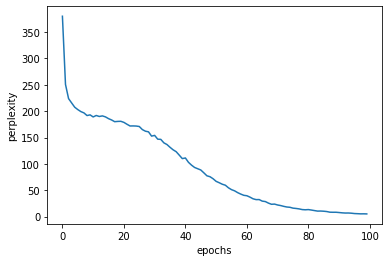

In [14]:
# 그래프 그리기
x = np.arange(len(ppl_list))
plt.plot(x, ppl_list, label='train')
plt.xlabel('epochs')
plt.ylabel('perplexity')
plt.show()

* 크기가 작은 말뭉치로 실험했을 때, 학습이 진행할수록 퍼플렉서티가 순조롭게 낮아진다.
* 큰 말뭉치는 대응 불가능하다.

### RNNLM의 Trainer 클래스
RnnlmTrainer 클래스

    from common.trainer import RnnlmTrainer

    model = SimpleRnnlm(vocab_size, wordvec_size, hidden_size)
    optimizer = SGD(lr)
    trainer = RnnlmTrainer(model, optimizer)

    trainer.fit(xs, ts, max_epoch, batch_size, time_size)

1. 미니배치를 **순차적**으로 만들기
2. 모델의 순전파와 역전파를 호출
3. 옵티마이저로 가중치 갱신
4. 퍼플렉서티 구한다.

## 정리
* RNN 순환하는 경로가 있고 이를 통해 내부에 은닉 상태를 기억할 수 있다.
* RNN의 순환 경로를 펼쳐서 다수의 RNN 계층이 연결된 신경망으로 해석할 수 있으며 보통의 오차역전파법으로 학습 가능하다.(=BPTT)
* 긴 시계열 데이터를 학습할 때는 데이터를 적당한 길이씩 모으고(블록), 블록 단위로 BPTT에 의한 학습을 수행(truncated BPTT)
* Truncated BPTT : 역전파의 연결만 끊는다.
* Truncated BPTT : 순전파 연결을 유지하기 위해 데이터를 순차적으로 입력해야 한다.
* 언어 모델은 단어 시퀸스를 확률로 해석한다.
* RNN 계층을 이용한 조건부 언어 모델은 이론적으로 그때까지 등장한 모든 단어의 정보를 기억할 수 있다.